## Importing stuff

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [3]:
colors = ['#4F2683', '#FFC62F' , 'f2f2f2']

##  Setting the dataframe up

In [4]:
df = pd.read_csv('pbp-2023.csv')
df

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2023121101,2023-12-11,3,1,28,NYG,GB,0,0,85,...,0,0,NaN,15,OPP,0,NaN,0,NaN,0
1,2023121101,2023-12-11,3,1,35,NYG,GB,3,7,92,...,0,0,NaN,8,OPP,0,NaN,0,NaN,0
2,2023121101,2023-12-11,3,2,19,NYG,GB,2,11,88,...,0,0,RIGHT GUARD,12,OPP,0,NaN,0,NaN,0
3,2023121101,2023-12-11,3,2,56,NYG,GB,1,10,89,...,0,0,CENTER,11,OPP,0,NaN,0,NaN,0
4,2023121101,2023-12-11,3,3,43,NYG,GB,1,10,64,...,0,0,NaN,36,OPP,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39467,2023091000,2023-09-10,2,14,1,ATL,CAR,0,0,100,...,0,0,NaN,0,OPP,0,NaN,0,NaN,0
39468,2023091000,2023-09-10,2,14,52,CAR,ATL,0,0,100,...,0,0,NaN,0,OPP,0,NaN,0,NaN,0
39469,2023091002,2023-09-10,4,9,11,CLE,CIN,0,0,100,...,0,0,NaN,0,OPP,0,NaN,0,NaN,0
39470,2023091000,2023-09-10,1,4,13,ATL,CAR,2,6,57,...,0,0,NaN,43,OPP,0,NaN,0,NaN,0


In [5]:
df.columns

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10',
       'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin',
       'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation',
       'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown',
       'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed',
       'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble',
       'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
       'RushDirection', 'YardLineFixed', 'YardLineDirection',
       'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType',
       'PenaltyYards'],
      dtype='object')

In [6]:
x = df['OffenseTeam'].unique()
for i in x:
    print(i)

NYG
TEN
MIA
GB
LAC
DEN
BUF
KC
NO
CAR
CLE
JAX
SF
CIN
IND
SEA
PHI
DAL
HOU
NYJ
LV
MIN
BAL
ATL
TB
CHI
DET
LA
PIT
NE
WAS
ARI


In [7]:
df[df['Yards'] == 99][['OffenseTeam', 'DefenseTeam']]

,OffenseTeam,DefenseTeam
16193,MIN,CAR
34976,NYJ,MIA


## Preprocessing

### Choosing columns

**Yes**: Quarter, Minute, Second, Down, Yards, IsInterception, PassType, PenaltyYards, PenaltyType, IsIncomplete, IsTouchdown, IsFumble, IsRush, IsPass, SeriesFirstDown

**No**: GameId, Unnamed: 10, GameDate, Unnamed: 12, Unnamed: 16, Unnamed: 17, NextScore, Description,  TeamWin, SeasonYear, IsTwoPointConversion, IsTwoPointConversionSuccessful, ChallengerIsSack, IsChallenge, IsChallengeReversed, IsMeasurement, RushDirection, IsNoPlay, Formation

**Data Splitters**: DefenseTeam, OffenseTeam, PenaltyTeam, IsPenaltyAccepted

In [8]:
yes_string =  "Quarter, Minute, Second, Down, Yards, IsInterception, PenaltyYards, PenaltyType, IsIncomplete, IsTouchdown, IsFumble, IsRush, IsPass, OffenseTeam, DefenseTeam, PenaltyTeam, IsPenaltyAccepted"
yes_list = yes_string.split(', ')

In [9]:
yes_list

['Quarter',
 'Minute',
 'Second',
 'Down',
 'Yards',
 'IsInterception',
 'PenaltyYards',
 'PenaltyType',
 'IsIncomplete',
 'IsTouchdown',
 'IsFumble',
 'IsRush',
 'IsPass',
 'OffenseTeam',
 'DefenseTeam',
 'PenaltyTeam',
 'IsPenaltyAccepted']

In [10]:
df = df[yes_list]
v = df[df["Down"] != 0]
v = v[v["Yards"] < 99]

### Sorting

In [11]:
o = v[v['OffenseTeam'] == 'MIN']
d = v[v['DefenseTeam'] ==  'MIN']
p = v[v['PenaltyTeam'] == 'MIN']

In [12]:
offense = o.drop(['OffenseTeam', 'DefenseTeam', 'PenaltyTeam', 'PenaltyYards', 'IsPenaltyAccepted', 'PenaltyType'], axis = 1)
defense = d.drop(['OffenseTeam', 'DefenseTeam', 'PenaltyTeam', 'PenaltyYards', 'IsPenaltyAccepted', 'PenaltyType'], axis = 1)
penalty = p.drop(['OffenseTeam', 'DefenseTeam', 'PenaltyTeam','Yards'], axis = 1)

## Experiment 1 Offense:

### Data Understanding

<AxesSubplot:>

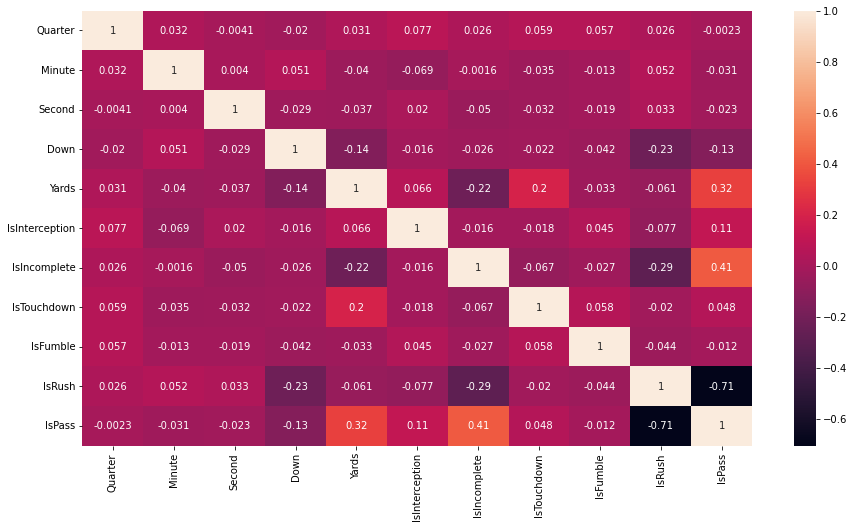

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(defense.corr(),annot = True)

### Preprocessing

**Keep**: IsPass, IsTouchdown, IsRush, IsFumble, IsIncomplete, 

**Drop**: Minute, Second, Quarter, Down, IsInterception

In [14]:
offense = offense.drop(['Minute', 'Second', 'Quarter', 'Down', 'IsInterception'], axis = 1)

### Modeling

In [15]:
offense_ols = smf.ols(formula = 'Yards~ IsPass + IsTouchdown + IsRush + IsFumble + IsIncomplete', data = offense)
results = offense_ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yards   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           9.32e-86
Time:                        19:19:36   Log-Likelihood:                -3198.2
No. Observations:                 962   AIC:                             6408.
Df Residuals:                     956   BIC:                             6438.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.7089      0.590     -2.896      0.004      -2.867      -0.551
IsPass          11.6829      0.690     16.925      0.000      10.328      13.038
IsTouchdown      8.2600      1.269      6.511      0.000       5.770      10.750
IsRush           5.6152      0.703      7.992      0.000       4.236       6.994
IsFumble         0.1796      1.497      0.120      0.905      -2.757       3.116
IsIncomplete    -9.8207      0.645    -15.220      0.000     -11.087      -8.554
==============================================================================
Omnibus:                      532.465   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7132.822
Skew:                           2.237   Prob(JB):                         0.00
Kurtosis:                      15.567   Cond. No.                         8.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Experiment 2: Defense

### Data Understanding

<AxesSubplot:>

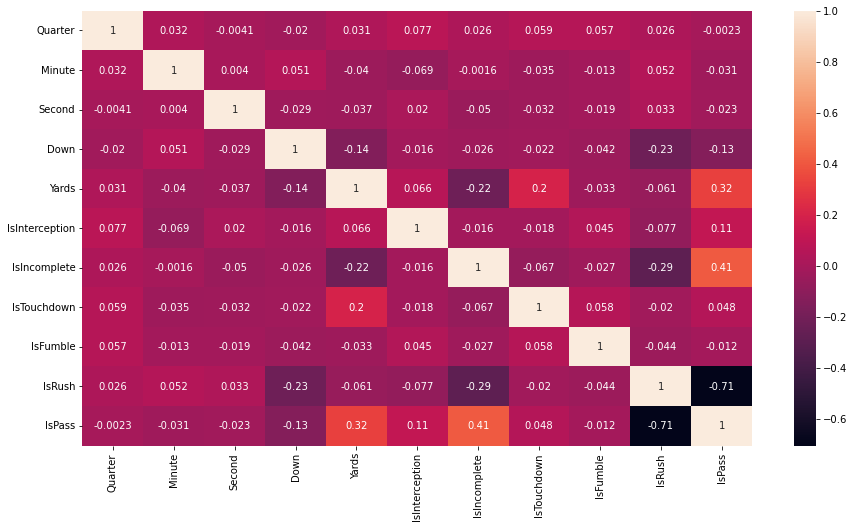

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(defense.corr(),annot = True)

### PreProcessing

**Keep**: Down, IsIncomplete, IsTouchdown, IsPass

**Drop**:Quarter, IsRush Minute, Second, IsFumble,  IsInterception

In [18]:
defense = defense[['Down', 'IsIncomplete', 'IsTouchdown', 'IsPass', 'Yards']]

### Modeling

In [19]:
defense_ols = smf.ols(formula = "Yards ~ Down + IsIncomplete + IsTouchdown + IsPass", data = defense)
results = defense_ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yards   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     94.69
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           7.99e-68
Time:                        19:19:37   Log-Likelihood:                -3168.9
No. Observations:                 956   AIC:                             6348.
Df Residuals:                     951   BIC:                             6372.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4304      0.560      6.125      0.000       2.331       4.530
Down            -0.6596      0.214     -3.083      0.002      -1.080      -0.240
IsIncomplete    -9.2542      0.680    -13.607      0.000     -10.589      -7.919
IsTouchdown      7.1467      1.361      5.252      0.000       4.476       9.817
IsPass           7.4521      0.480     15.517      0.000       6.510       8.395
==============================================================================
Omnibus:                      478.267   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4720.283
Skew:                           2.061   Prob(JB):                         0.00
Kurtosis:                      13.075   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
pca = PCA(n_components = 2, random_state = 7)
pca_mdl = pca.fit_transform(defense)
pca_df = pd.DataFrame(pca_mdl)
pca_df

,0,1
0,-2.606382,-0.135632
1,-1.627299,-0.056492
2,-3.587311,-1.152774
3,33.359126,1.564901
4,-6.625096,-0.154119
...,...,...
951,-4.607347,-1.112685
952,-0.646370,0.960650
953,-4.607347,-1.112685
954,-2.608228,-1.073634


## Experiment 3: Penalty

In [26]:
penalty = penalty[penalty['IsPenaltyAccepted'] == 1]

### Data Understanding

<AxesSubplot:>

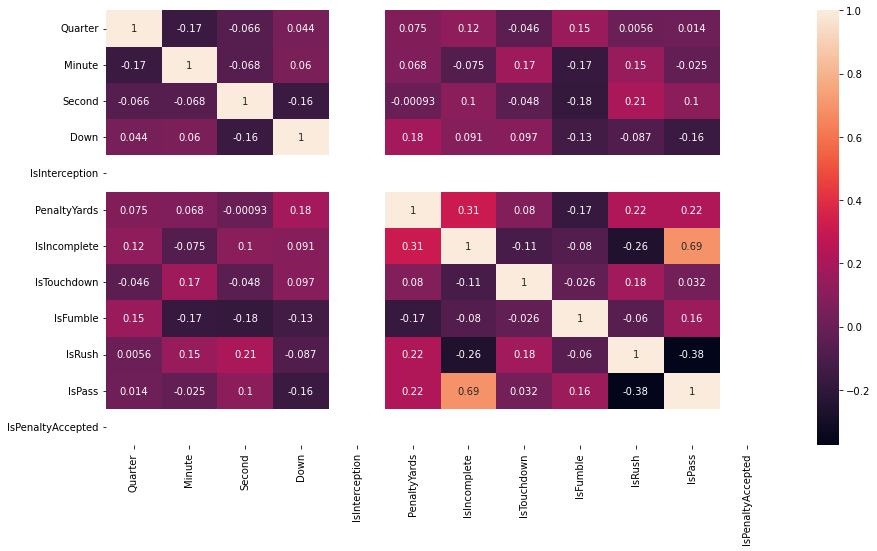

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(penalty.corr(),annot = True)

### Pre Processing

**Keep**: IsIncomplete, IsFumble, IsRush, IsPass, Down

In [29]:
penalty = penalty[['PenaltyYards', 'IsIncomplete', 'IsFumble', 'IsRush', 'IsPass', 'Down']]

### Modeling

In [31]:
defense_ols = smf.ols(formula = "PenaltyYards ~ Down + IsIncomplete + IsFumble + IsPass + IsRush", data = penalty)
results = defense_ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PenaltyYards   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     3.784
Date:                Sun, 24 Mar 2024   Prob (F-statistic):            0.00562
Time:                        19:34:56   Log-Likelihood:                -167.10
No. Observations:                  55   AIC:                             346.2
Df Residuals:                      49   BIC:                             358.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7916      2.025      0.885      0.381      -2.278       5.861
Down             1.3422      0.748      1.795      0.079      -0.160       2.844
IsIncomplete     2.0159      2.463      0.818      0.417      -2.934       6.965
IsFumble        -7.1645      5.677     -1.262      0.213     -18.573       4.244
IsPass           4.0307      2.322      1.736      0.089      -0.636       8.697
IsRush           6.3779      2.134      2.989      0.004       2.089      10.666
==============================================================================
Omnibus:                       51.614   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.650
Skew:                           2.479   Prob(JB):                     8.44e-61
Kurtosis:                      12.805   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""